In [1]:
import numpy as np

In [34]:
results = [
    [{'bd': np.float64(1.259941248903607), 'bd_err': np.float64(1.5295734980041344), 'vel_centres': 0, 'num_bins': 1, 'num_gaussians': 0}, {'bd': np.array([1.21941212, 0.60070752]), 'bd_err': np.array([1.19283124, 5.07687241]), 'vel_centres': np.array([-1750.,  1750.]), 'num_bins': 2, 'num_gaussians': 0}, {'bd': np.array([0.94590278, 1.24050964, 1.25297476]), 'bd_err': np.array([2.40677083, 0.82495614, 1.80457912]), 'vel_centres': np.array([-2.33333333e+03,  2.27373675e-13,  2.33333333e+03]), 'num_bins': 3, 'num_gaussians': 0}, {'bd': np.array([2.84215891, 1.24878714, 1.17268816, 1.35116524]), 'bd_err': np.array([15.00664197,  0.71575628,  1.05457063,  1.56191441]), 'vel_centres': np.array([-2625.,  -875.,   875.,  2625.]), 'num_bins': 4, 'num_gaussians': 0}, {'bd': np.array([1.57068979, 1.17312591, 0.20088987, 1.5257746 , 1.35067182]), 'bd_err': np.array([1.91302476, 0.72311338, 2.04803223, 0.82886677, 1.18102902]), 'vel_centres': np.array([-2800., -1400.,     0.,  1400.,  2800.]), 'num_bins': 5, 'num_gaussians': 0}, {'bd': np.array([1.81461805, 1.20904832, 1.33975178, 0.89535616, 1.26032764,
       1.20524055]), 'bd_err': np.array([4.10729526, 1.12365864, 1.12677317, 0.89783324, 1.99838548,
       0.62271586]), 'vel_centres': np.array([-2916.66666667, -1750.        ,  -583.33333333,   583.33333333,
        1750.        ,  2916.66666667]), 'num_bins': 6, 'num_gaussians': 0}, {'bd': np.array([2.17470446, 0.49940258, 1.37318064, 0.91349054, 1.3185911 ,
       0.96318623, 1.27111338]), 'bd_err': np.array([4.07306194, 9.26896113, 0.73070219, 2.13671192, 0.57661728,
       1.46721624, 0.4903146 ]), 'vel_centres': np.array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]), 'num_bins': 7, 'num_gaussians': 0}],
       [{'bd': np.float64(4.035112268024834), 'bd_err': np.float64(0.04572020136254706), 'vel_centres': 0, 'num_bins': 1, 'num_gaussians': 1}, {'bd': np.array([4.55629423, 3.8148887 ]), 'bd_err': np.array([0.07371996, 0.04376256]), 'vel_centres': np.array([-1750.,  1750.]), 'num_bins': 2, 'num_gaussians': 1}, {'bd': np.array([7.53897851, 3.80442036, 4.53766469]), 'bd_err': np.array([0.47065038, 0.04088221, 0.12826221]), 'vel_centres': np.array([-2.33333333e+03,  2.27373675e-13,  2.33333333e+03]), 'num_bins': 3, 'num_gaussians': 1}, {'bd': np.array([11.08301062,  4.43381991,  3.72865911,  4.83367369]), 'bd_err': np.array([1.4334059 , 0.10423856, 0.03790931, 0.28711274]), 'vel_centres': np.array([-2625.,  -875.,   875.,  2625.]), 'num_bins': 4, 'num_gaussians': 1}, {'bd': np.array([19.46255451,  5.63600162,  3.72845838,  3.96126474,  5.61916002]), 'bd_err': np.array([1.9528578 , 0.17861124, 0.05562238, 0.0586992 , 0.38450223]), 'vel_centres': np.array([-2800., -1400.,     0.,  1400.,  2800.]), 'num_bins': 5, 'num_gaussians': 1}, {'bd': np.array([19.10558072,  7.31267409,  4.23292453,  3.57259713,  4.34083973,
        7.8497205 ]), 'bd_err': np.array([3.55385396, 0.46819959, 0.08856262, 0.0364035 , 0.1090425 ,
       0.81495266]), 'vel_centres': np.array([-2916.66666667, -1750.        ,  -583.33333333,   583.33333333,
        1750.        ,  2916.66666667]), 'num_bins': 6, 'num_gaussians': 1}, {'bd': np.array([21.86107185,  9.11107944,  4.97669566,  4.01902846,  3.33320514,
        4.84513846,  8.59878951]), 'bd_err': np.array([4.87055564, 0.98213536, 0.21010326, 0.06487624, 0.05703678,
       0.24657576, 1.18615367]), 'vel_centres': np.array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]), 'num_bins': 7, 'num_gaussians': 1}],
       [{'bd': np.float64(4.134692069378743), 'bd_err': np.float64(0.06945650939914114), 'vel_centres': 0, 'num_bins': 1, 'num_gaussians': 2}, {'bd': np.array([4.68119038, 3.92245962]), 'bd_err': np.array([0.2031519 , 0.07170569]), 'vel_centres': np.array([-1750.,  1750.]), 'num_bins': 2, 'num_gaussians': 2}, {'bd': np.array([10.98784667,  3.8000389 ,  4.63015246]), 'bd_err': np.array([1.20678834, 0.08075481, 0.19214955]), 'vel_centres': np.array([-2.33333333e+03,  2.27373675e-13,  2.33333333e+03]), 'num_bins': 3, 'num_gaussians': 2}, {'bd': np.array([21.06646889,  4.38122747,  3.76336794,  5.85068794]), 'bd_err': np.array([5.2069116 , 0.14722347, 0.07863024, 0.90087692]), 'vel_centres': np.array([-2625.,  -875.,   875.,  2625.]), 'num_bins': 4, 'num_gaussians': 2}, {'bd': np.array([45.05014663,  6.5826591 ,  3.76936733,  3.70162784,  7.71553082]), 'bd_err': np.array([8.93932608, 0.4677444 , 0.09738737, 0.0845802 , 4.31095939]), 'vel_centres': np.array([-2800., -1400.,     0.,  1400.,  2800.]), 'num_bins': 5, 'num_gaussians': 2}, {'bd': np.array([52.53541343, 10.19873369,  4.00961947,  3.71082783,  4.21483409,
       11.73540611]), 'bd_err': np.array([9.54527876, 0.92232402, 0.13740222, 0.07904255, 0.20535429,
       1.45968839]), 'vel_centres': np.array([-2916.66666667, -1750.        ,  -583.33333333,   583.33333333,
        1750.        ,  2916.66666667]), 'num_bins': 6, 'num_gaussians': 2}, {'bd': np.array([65.75565938, 14.74345966,  5.25229971,  4.01843081,  3.15653452,
        5.08648677, 13.6485056 ]), 'bd_err': np.array([ 9.49831622,  1.64694997,  0.38823646,  0.11421012,  0.06274315,
        0.39386877, 23.4810216 ]), 'vel_centres': np.array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]), 'num_bins': 7, 'num_gaussians': 2}],
        [{'bd': np.float64(4.257920444342604), 'bd_err': np.float64(0.09774633892540092), 'vel_centres': 0, 'num_bins': 1, 'num_gaussians': 3}, {'bd': np.array([4.83550615, 4.01037054]), 'bd_err': np.array([0.20164963, 0.09462303]), 'vel_centres': np.array([-1750.,  1750.]), 'num_bins': 2, 'num_gaussians': 3}, {'bd': np.array([137.99500982,   3.7344721 ,   4.53591036]), 'bd_err': np.array([1.63749344e+02, 7.49196604e-02, 3.70751336e-01]), 'vel_centres': np.array([-2.33333333e+03,  2.27373675e-13,  2.33333333e+03]), 'num_bins': 3, 'num_gaussians': 3}, {'bd': np.array([6.53237566e+03, 4.32529922e+00, 3.81766131e+00, 9.74838267e+00]), 'bd_err': np.array([1.76186022e+05, 1.99173345e-01, 8.72277258e-02, 3.90794290e+00]), 'vel_centres': np.array([-2625.,  -875.,   875.,  2625.]), 'num_bins': 4, 'num_gaussians': 3}, {'bd': np.array([9.73717322e+04, 1.07605721e+01, 3.64938060e+00, 3.66142274e+00,
            4.40673603e+01]), 'bd_err': np.array([2.68714378e+07, 1.18280303e+00, 9.88898997e-02, 1.07653521e-01,
            1.40135781e+02]), 'vel_centres': np.array([-2800., -1400.,     0.,  1400.,  2800.]), 'num_bins': 5, 'num_gaussians': 3}, {'bd': np.array([3.22223371e+05, 1.22457334e+02, 3.57119109e+00, 3.83367604e+00,
            3.99913469e+00, 1.53211094e+02]), 'bd_err': np.array([1.16309627e+08, 1.37403482e+02, 1.47320187e-01, 1.05451362e-01,
            2.35586868e-01, 2.94958237e+03]), 'vel_centres': np.array([-2916.66666667, -1750.        ,  -583.33333333,   583.33333333,
                1750.        ,  2916.66666667]), 'num_bins': 6, 'num_gaussians': 3}, {'bd': np.array([8.29021358e+05, 1.41535762e+03, 5.43084851e+00, 4.13407614e+00,
            3.26606926e+00, 4.97316150e+00, 2.66331174e+02]), 'bd_err': np.array([1.61676317e+09, 3.61419693e+04, 3.80462503e-01, 1.12154859e-01,
            7.99883174e-02, 5.07546482e-01, 1.40046060e+04]), 'vel_centres': np.array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]), 'num_bins': 7, 'num_gaussians': 3}],
        [{'bd': np.float64(4.305809246376783), 'bd_err': np.float64(0.09791538865795553), 'vel_centres': 0, 'num_bins': 1, 'num_gaussians': 4}, {'bd': np.array([4.90214271, 4.06027666]), 'bd_err': np.array([0.18010561, 0.11434695]), 'vel_centres': np.array([-1750.,  1750.]), 'num_bins': 2, 'num_gaussians': 4}, {'bd': np.array([126.37789641,   3.73600592,   4.81133296]), 'bd_err': np.array([63.2155867 ,  0.0850898 ,  0.51136212]), 'vel_centres': np.array([-2.33333333e+03,  2.27373675e-13,  2.33333333e+03]), 'num_bins': 3, 'num_gaussians': 4}, {'bd': np.array([1.88925260e+04, 4.25930981e+00, 3.81067484e+00, 1.36660811e+01]), 'bd_err': np.array([8.53165476e+06, 1.75496847e-01, 9.14752272e-02, 1.09040493e+01]), 'vel_centres': np.array([-2625.,  -875.,   875.,  2625.]), 'num_bins': 4, 'num_gaussians': 4}, {'bd': np.array([4.60245479e+06, 9.68370230e+00, 3.70239363e+00, 3.66576426e+00,
            2.41293376e+02]), 'bd_err': np.array([1.07839632e+10, 1.03852983e+00, 9.88611769e-02, 1.26709956e-01,
            5.40047778e+03]), 'vel_centres': np.array([-2800., -1400.,     0.,  1400.,  2800.]), 'num_bins': 5, 'num_gaussians': 4}, {'bd': np.array([1.00404391e+08, 1.04100365e+02, 3.59969268e+00, 3.83183624e+00,
            4.10740636e+00, 1.17556239e+04]), 'bd_err': np.array([2.68035274e+10, 5.22000389e+01, 1.64774062e-01, 9.78215948e-02,
            2.50541544e-01, 1.86677463e+07]), 'vel_centres': np.array([-2916.66666667, -1750.        ,  -583.33333333,   583.33333333,
                1750.        ,  2916.66666667]), 'num_bins': 6, 'num_gaussians': 4}, {'bd': np.array([1.02799919e+09, 1.71130944e+03, 5.20109301e+00, 4.08236069e+00,
            3.28448743e+00, 5.38777408e+00, 1.27064949e+05]), 'bd_err': np.array([8.68075702e+14, 4.97964349e+04, 4.15142341e-01, 1.29240774e-01,
            9.42232312e-02, 8.34926612e-01, 2.78618480e+09]), 'vel_centres': np.array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]), 'num_bins': 7, 'num_gaussians': 4}],
        [{'bd': np.float64(4.069828693498003), 'bd_err': np.float64(0.09247511998162314), 'vel_centres': 0, 'num_bins': 1, 'num_gaussians': 5}, {'bd': np.array([4.86792981, 3.75546363]), 'bd_err': np.array([0.20794486, 0.10030704]), 'vel_centres': np.array([-1750.,  1750.]), 'num_bins': 2, 'num_gaussians': 5}, {'bd': np.array([116.48905039,   3.74776036,   3.52846795]), 'bd_err': np.array([87.64194096,  0.0885664 ,  0.23634937]), 'vel_centres': np.array([-2.33333333e+03,  2.27373675e-13,  2.33333333e+03]), 'num_bins': 3, 'num_gaussians': 5}, {'bd': np.array([1.60637686e+04, 4.32911537e+00, 3.81985648e+00, 3.34828459e+00]), 'bd_err': np.array([4.31889985e+06, 1.62964067e-01, 7.90775074e-02, 6.51322125e-01]), 'vel_centres': np.array([-2625.,  -875.,   875.,  2625.]), 'num_bins': 4, 'num_gaussians': 5}, {'bd': np.array([4.56861114e+06, 9.75741595e+00, 3.68579712e+00, 3.65479459e+00,
            2.64900305e+00]), 'bd_err': np.array([2.02498252e+10, 1.09158089e+00, 9.25736639e-02, 1.19028782e-01,
            3.71089417e-01]), 'vel_centres': np.array([-2800., -1400.,     0.,  1400.,  2800.]), 'num_bins': 5, 'num_gaussians': 5}, {'bd': np.array([1.17428769e+08, 9.14327986e+01, 3.63857650e+00, 3.83502887e+00,
            4.02420625e+00, 2.07653644e+00]), 'bd_err': np.array([9.99664800e+10, 6.78613960e+01, 1.16445232e-01, 1.12168178e-01,
            3.23595655e-01, 4.06628028e-01]), 'vel_centres': np.array([-2916.66666667, -1750.        ,  -583.33333333,   583.33333333,
                1750.        ,  2916.66666667]), 'num_bins': 6, 'num_gaussians': 5}, {'bd': np.array([1.31006494e+09, 1.24214607e+03, 5.48980105e+00, 4.06358493e+00,
            3.29093082e+00, 4.91256357e+00, 1.78502306e+00]), 'bd_err': np.array([6.05346534e+15, 1.97941773e+04, 3.51145830e-01, 1.16867922e-01,
            1.01496205e-01, 5.76073510e-01, 3.47667151e-01]), 'vel_centres': np.array([-3000., -2000., -1000.,     0.,  1000.,  2000.,  3000.]), 'num_bins': 7, 'num_gaussians': 5}]
]

In [42]:
i = 0
obr = [row[0] for row in results]
[dic["bd"] for dic in obr]

[np.float64(1.259941248903607),
 np.float64(4.035112268024834),
 np.float64(4.134692069378743),
 np.float64(4.257920444342604),
 np.float64(4.305809246376783),
 np.float64(4.069828693498003)]

Fitted parameters:
  Amplitude A = 1210.05 ± 82.88
  Center μ    = -41.35 ± 0.61
  Width σ     = 11.45 ± 0.89


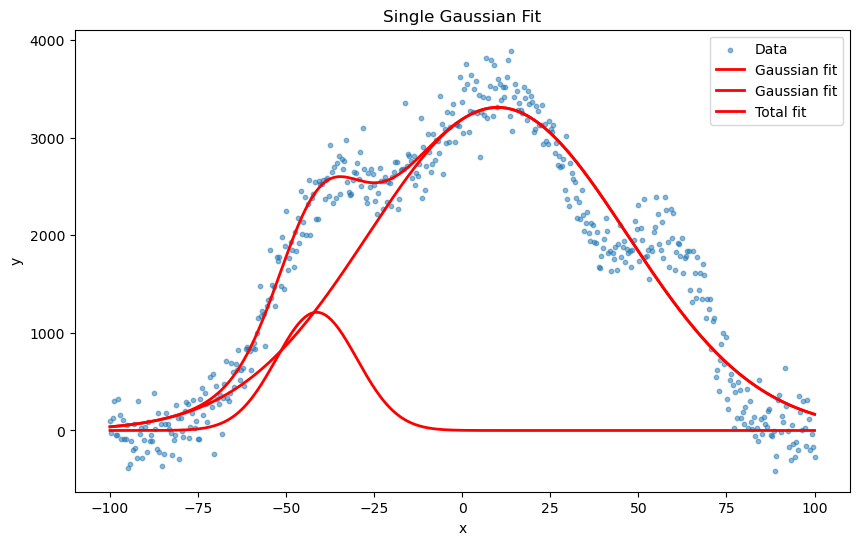

In [ ]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt

# --- Step 1: Generate the data ---
# Your original data (a noisy inverted parabola)
np.random.seed(42)
x = np.linspace(-100, 100, 500)
y_true = (
    2000 * np.exp(-(x + 40)**2 / (2 * 15**2)) +  # Peak 1
    3500 * np.exp(-(x - 10)**2 / (2 * 25**2)) +  # Peak 2
    1500 * np.exp(-(x - 60)**2 / (2 * 10**2))    # Peak 3
)
noise = np.random.normal(0, 200, len(x))
y = y_true + noise

# --- Step 2: Define the Gaussian model function ---
# A Gaussian has 3 parameters: amplitude (A), center (mu), and width (sigma)
# The functional form is: f(x) = A * exp(-(x - mu)^2 / (2 * sigma^2))
def my_gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


def n_gaussians(x, n, peaks, mus, sigmas):
    """Sum of n Gaussians"""
    res = np.zeros_like(x)
    for i in range(n):
        res += peaks[i] * np.exp(-(x - mus[i])**2 / (2 * sigmas[i]**2))
    return res

def get_initial_guesses(
    n: int,
    x: np.ndarray,
    y: np.ndarray
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    peak = np.ones(n) * np.max(y)
    mu_guesses = np.ones(n) * x[np.argmax(y)]

    peak_indices = [np.argmax(y)] * n
    fwhm_guesses, _, _, _ = sps.peak_widths(y, peak_indices, rel_height=0.5) # returns width in indices at half max
    peak_x_diffs = get_masked_diffs(x, peak_indices)
    fwhm_guesses = fwhm_guesses * peak_x_diffs
    sigma_guesses = fwhm_guesses / SIGMA_TO_FWHM

def multi_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    """Sum of two Gaussians"""
    g1 = A1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    g2 = A2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    return g1 + g2

# Initial guesses for 2 peaks (you'd adjust these based on your data)
p0_multi = [3000, -30, 30,   # First Gaussian: A1, mu1, sigma1
            3000,  30, 30]   # Second Gaussian: A2, mu2, sigma2

popt_multi, pcov_multi = spo.curve_fit(multi_gaussian, x, y, p0=p0_multi)

perr_multi = np.sqrt(np.diag(pcov_multi))

# --- Step 3: Provide initial guesses for the parameters ---
# Good initial guesses help the optimizer converge faster and avoid local minima
# - A (amplitude): Use the maximum of the data
# - mu (center): Use the x-value where y is maximum
# - sigma (width): Estimate from the data spread (e.g., std dev of x where y > half-max)
A_guess = np.max(y)                    # Peak height
mu_guess = x[np.argmax(y)]             # x-position of peak
sigma_guess = 50                        # Rough estimate of width

p0 = [A_guess, mu_guess, sigma_guess]

# --- Step 4: Perform the curve fit ---
# curve_fit uses non-linear least squares (Levenberg-Marquardt by default)
# It minimizes the sum of squared residuals: Σ(y_data - y_model)^2
popt, pcov = spo.curve_fit(my_gaussian, x, y, p0=p0)

# popt: optimal parameters [A, mu, sigma]
# pcov: covariance matrix (diagonal gives variance of each parameter)

# --- Step 5: Extract results and uncertainties ---
# A_fit, mu_fit, sigma_fit = popt
A_fit_1, mu_fit_1, sigma_fit_1, A_fit_2, mu_fit_2, sigma_fit_2 = popt_multi
# perr = np.sqrt(np.diag(pcov))  # Standard errors from covariance matrix
perr = np.sqrt(np.diag(pcov_multi))  # Standard errors from covariance matrix

print(f"Fitted parameters:")
print(f"  Amplitude A = {A_fit_1:.2f} ± {perr[0]:.2f}")
print(f"  Center μ    = {mu_fit_1:.2f} ± {perr[1]:.2f}")
print(f"  Width σ     = {sigma_fit_1:.2f} ± {perr[2]:.2f}")

# --- Step 6: Plot the result ---
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.5, label='Data')
plt.plot(x, my_gaussian(x, *popt_multi[0:3]), 'r-', linewidth=2, label='Gaussian fit')
plt.plot(x, my_gaussian(x, *popt_multi[3:6]), 'r-', linewidth=2, label='Gaussian fit')
plt.plot(x, my_gaussian(x, *popt_multi[0:3]) + my_gaussian(x, *popt_multi[3:6]), 'r-', linewidth=2, label='Total fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Single Gaussian Fit')
plt.show()